<a href="https://colab.research.google.com/github/upeast/Lee2/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6주차

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(0.0, 4.0)

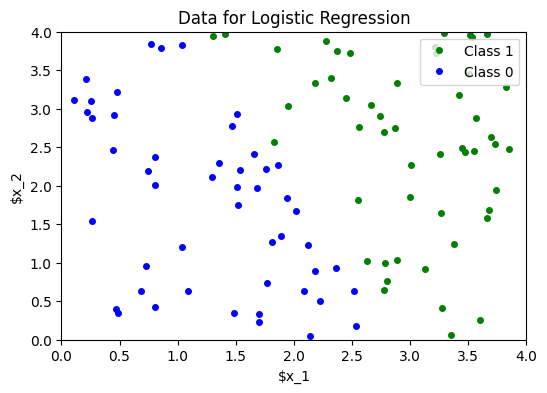

In [7]:
# 학습 데이터 생성

m = 100
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5    # ([true],...[false]....])

C1 = np.where(y == True)[0]   # y가 true인 인덱스 값을 return
C0 = np.where(y == False)[0]  # y가 false인 인덱스 값을 return

y = np.empty([m,1])
y[C1] = 1   # Class 1
y[C0] = 0   # Class 0

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.title('Data for Logistic Regression')
plt.xlabel(r'$x_1')
plt.ylabel(r'$x_2')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])

CVYPY함수 이용한 로지스틱 회귀

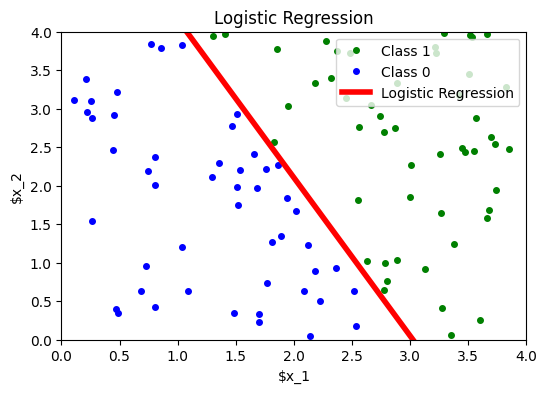

In [9]:
import cvxpy as cvx

w = cvx.Variable([3,1])

obj = cvx.Maximize(y.T@X@w - cvx.sum(cvx.logistic(X@w)))

prob = cvx.Problem(obj).solve()

w = w.value

xp =np.linspace(0,4,100).reshape(-1,1)
yp = -w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1')
plt.ylabel(r'$x_2')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()


경사하강법

In [10]:
def h(x,w):
    return 1/(1 + np.exp(-x*w))

In [12]:

w = np.zeros([3,1])

alpha = 0.01

for i in range(10000):
    df = -X.T*(y-h(X,w))               # 파라미터w에 대한 편미분
    w = w - alpha*df                     # 파라미터 w update

print(w)

[[-33.66722682]
 [ 11.45816124]
 [  5.05223103]]


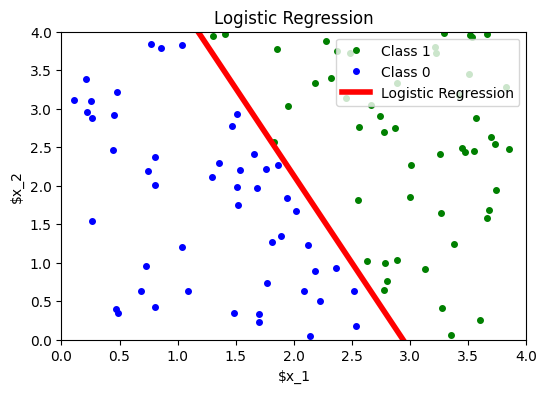

In [13]:
xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1')
plt.ylabel(r'$x_2')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

Scikit-Learn

In [14]:
X = X[:, 1:3]

X.shape

(100, 2)

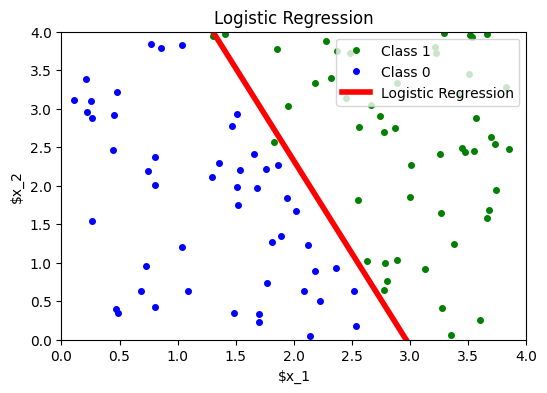

In [17]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(np.asarray(X),np.ravel(y))

w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(X[C1,0], X[C1,1], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,0], X[C0,1], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1')
plt.ylabel(r'$x_2')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()


데이터 분류

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

from six.moves import cPickle  # for data loading

data = cPickle.load(open('/content/drive/MyDrive/Machine Learning실습/binary_data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']